In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
flights = pd.read_csv('flight_data.csv')
flights = flights.dropna()

In [3]:
flights.head()

,price,airline,fare_class,depart_time,depart_date,arrival_time,arrival_date,src,dest,cabin_luggage,hand_luggage
0,2.826.000,VietnamAirlines VN 7550,Eco (L),09:15,24 th 6,11:15,24 th 6,Nha Trang CXR,Hà Nội HAN,23,12
1,2.189.000,VietJetAir VJ770,B1_ECO,08:00,24 th 6,09:50,24 th 6,Nha Trang CXR,Hà Nội HAN,0,7
2,1.648.000,VietnamAirlines VN 7560,Eco (E),23:50,24 th 6,01:50,25 th 6,Nha Trang CXR,Hà Nội HAN,23,12
3,1.854.000,VietJetAir VJ1770,J1_ECO,23:40,24 th 6,01:30,25 th 6,Nha Trang CXR,Hà Nội HAN,0,7
4,1.875.000,VietnamAirlines VN 7582,Eco (T),23:40,24 th 6,01:40,25 th 6,Nha Trang CXR,Hà Nội HAN,23,12


In [4]:
src = flights['src'].tolist()
dest = flights['dest'].tolist()

def extract_airport_codes(airport):
    return airport.split()[-1]

src = [extract_airport_codes(airport) for airport in src]
dest = [extract_airport_codes(airport) for airport in dest]

flights['src'] = src
flights['dest'] = dest

In [5]:
airline = flights['airline'].tolist()
airline = [name.split()[0] for name in airline]
flights['airline'] = airline

In [6]:
fare_class = flights['fare_class'].tolist()

def extract_fare_class(fare):
    if "eco" in fare.lower():
        return "Economy"
    elif "dlx" in fare.lower():
        return "Deluxe"
    else:
        return "Business"
    
fare_class = [extract_fare_class(fare) for fare in fare_class]
flights['fare_class'] = fare_class
# Get random sample of 10 rows
flights_2 = flights.sample(10)
fare_class_2 = [extract_fare_class(fare) for fare in flights_2['fare_class'].tolist()]
print(flights_2)
print(fare_class_2)


             price          airline fare_class depart_time depart_date  \
71915    1.595.000       VietJetAir    Economy       04:50     27 th 6   
49336    4.579.000    BambooAirways   Business       16:25     03 th 7   
46284    3.560.000  VietnamAirlines    Economy       16:20     20 th 8   
63926    4.851.000  VietnamAirlines    Economy       21:00     04 th 7   
126130   2.318.000  VietnamAirlines    Economy       13:05     12 th 8   
96539    5.111.000  VietnamAirlines    Economy       07:50     14 th 7   
155535   1.905.000  VietnamAirlines    Economy       01:00     12 th 7   
29406    2.318.000  VietnamAirlines    Economy       15:25     11 th 7   
65785   11.493.000  VietnamAirlines   Business       20:30     17 th 7   
127053   2.999.000       VietJetAir   Business       15:00     16 th 8   

       arrival_time arrival_date  src dest  cabin_luggage  hand_luggage  
71915         07:00      27 th 6  HAN  SGN              0             7  
49336         17:50      03 th 7  HAN

In [7]:
depart_time = flights['depart_time'].tolist()
arrive_time = flights['arrival_time'].tolist()

# Calculate flight duration
flight_duration = []
for i in range(len(depart_time)):
    depart = depart_time[i].split(":")
    arrive = arrive_time[i].split(":")
    depart = int(depart[0]) * 60 + int(depart[1])
    arrive = int(arrive[0]) * 60 + int(arrive[1])
    duration = arrive - depart
    if duration < 0:
        duration += 1440
    duration = float(duration / 60)

    # Round to 2 decimal places
    duration = round(duration, 2)
    flight_duration.append(duration)

flight_duration
flights['duration'] = flight_duration

In [8]:
depart_time = flights['depart_time'].tolist()
arrive_time = flights['arrival_time'].tolist()

def extract_hour(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 22:
        return "Evening"
    else:
        return "Night"
    
depart_time = [extract_hour(time) for time in depart_time]
arrive_time = [extract_hour(time) for time in arrive_time]

flights['depart_time'] = depart_time
flights['arrival_time'] = arrive_time

In [9]:

# Drop index column
# flights = flights.drop(columns=[''], axis=1, inplace=True)
price = flights['price'].tolist()

# Remove . from price
price = [int(p.replace(".","")) for p in price]

flights['price'] = price

In [10]:
depart_date = flights['depart_date'].tolist()
arrive_date = flights['arrival_date'].tolist()

def extract_month(date):
    month = int(date.split(' ')[3])
    day = int(date.split(' ')[1])
    datetime = f"2024/{month}/{day}"


    
    datetime = pd.to_datetime(datetime, format='%Y/%m/%d')
    snapshot_date = "2024/06/21"
    snapshot_date = pd.to_datetime(snapshot_date, format='%Y/%m/%d')
    days_left = (datetime - snapshot_date).days
    return days_left

days_left = [extract_month(date) for date in depart_date]
days_left    
flights['days_left'] = days_left



In [11]:
flights

,price,airline,fare_class,depart_time,depart_date,arrival_time,arrival_date,src,dest,cabin_luggage,hand_luggage,duration,days_left
0,2826000,VietnamAirlines,Economy,Morning,24 th 6,Morning,24 th 6,CXR,HAN,23,12,2.00,3
1,2189000,VietJetAir,Economy,Morning,24 th 6,Morning,24 th 6,CXR,HAN,0,7,1.83,3
2,1648000,VietnamAirlines,Economy,Night,24 th 6,Night,25 th 6,CXR,HAN,23,12,2.00,3
3,1854000,VietJetAir,Economy,Night,24 th 6,Night,25 th 6,CXR,HAN,0,7,1.83,3
4,1875000,VietnamAirlines,Economy,Night,24 th 6,Night,25 th 6,CXR,HAN,23,12,2.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159958,4024000,VietnamAirlines,Business,Morning,24 th 8,Morning,24 th 8,SGN,PQC,32,18,1.00,64
159959,4024000,VietnamAirlines,Business,Morning,24 th 8,Morning,24 th 8,SGN,PQC,32,18,1.00,64
159960,4024000,VietnamAirlines,Business,Afternoon,24 th 8,Evening,24 th 8,SGN,PQC,32,18,1.00,64
159961,4024000,VietnamAirlines,Business,Night,24 th 8,Night,24 th 8,SGN,PQC,32,18,1.00,64


In [12]:
flights.drop(columns=['depart_date', 'arrival_date'], axis=1, inplace=True)

In [13]:
flights

,price,airline,fare_class,depart_time,arrival_time,src,dest,cabin_luggage,hand_luggage,duration,days_left
0,2826000,VietnamAirlines,Economy,Morning,Morning,CXR,HAN,23,12,2.00,3
1,2189000,VietJetAir,Economy,Morning,Morning,CXR,HAN,0,7,1.83,3
2,1648000,VietnamAirlines,Economy,Night,Night,CXR,HAN,23,12,2.00,3
3,1854000,VietJetAir,Economy,Night,Night,CXR,HAN,0,7,1.83,3
4,1875000,VietnamAirlines,Economy,Night,Night,CXR,HAN,23,12,2.00,3
...,...,...,...,...,...,...,...,...,...,...,...
159958,4024000,VietnamAirlines,Business,Morning,Morning,SGN,PQC,32,18,1.00,64
159959,4024000,VietnamAirlines,Business,Morning,Morning,SGN,PQC,32,18,1.00,64
159960,4024000,VietnamAirlines,Business,Afternoon,Evening,SGN,PQC,32,18,1.00,64
159961,4024000,VietnamAirlines,Business,Night,Night,SGN,PQC,32,18,1.00,64


In [14]:
flights.to_csv('flight_data_cleaned_v2.csv', index=False)

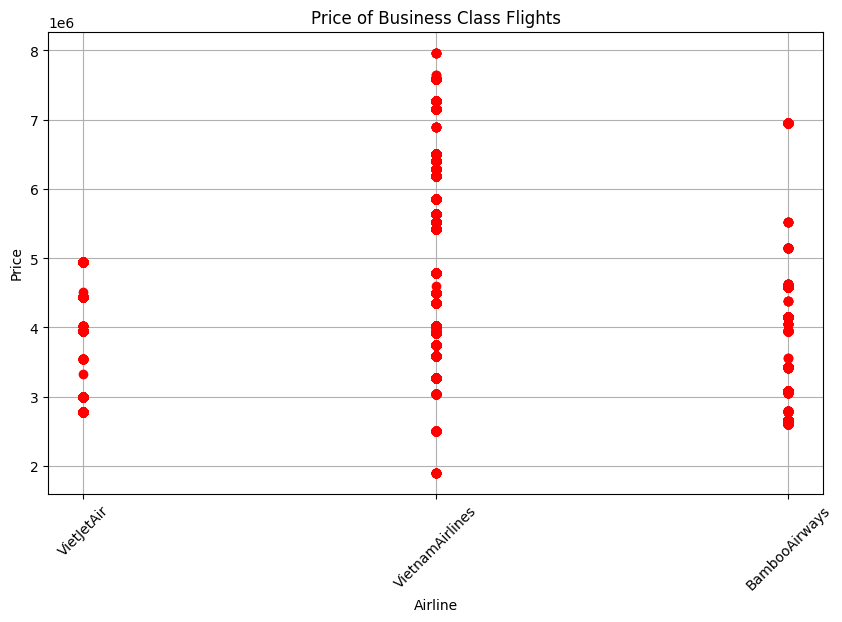

In [15]:
business_flights = flights[flights['fare_class'] == 'Business']

# Remove outliers based on IQR
Q1 = business_flights['price'].quantile(0.25)
Q3 = business_flights['price'].quantile(0.75)
IQR = Q3 - Q1
business_flights = business_flights[(business_flights['price'] >= Q1 - 1.5 * IQR) & (business_flights['price'] <= Q3 + 1.5 * IQR)]

#point plot
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Price of Business Class Flights")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.grid()
plt.plot(business_flights['airline'], business_flights['price'], 'ro')
plt.show()




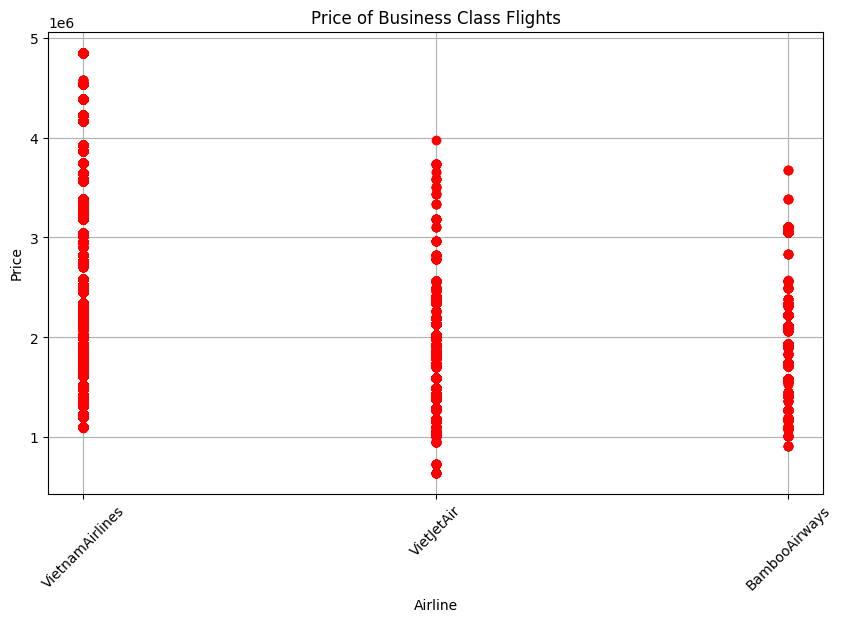

In [16]:
economy_flights = flights[flights['fare_class'] == 'Economy']

# Remove outliers based on IQR
Q1 = economy_flights['price'].quantile(0.25)
Q3 = economy_flights['price'].quantile(0.75)
IQR = Q3 - Q1
economy_flights = economy_flights[(economy_flights['price'] >= Q1 - 1.5 * IQR) & (economy_flights['price'] <= Q3 + 1.5 * IQR)]

#point plot
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Price of Business Class Flights")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.grid()
plt.plot(economy_flights['airline'], economy_flights['price'], 'ro')
plt.show()

merged = pd.concat([business_flights, economy_flights])

In [17]:
flights_enc = pd.get_dummies(merged, drop_first=False)
flights_enc

,price,cabin_luggage,hand_luggage,duration,days_left,airline_BambooAirways,airline_VietJetAir,airline_VietnamAirlines,fare_class_Business,fare_class_Economy,...,src_CXR,src_DAD,src_HAN,src_PQC,src_SGN,dest_CXR,dest_DAD,dest_HAN,dest_PQC,dest_SGN
66,3949000,30,10,1.83,3,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
67,3949000,30,10,1.83,3,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
68,3949000,30,10,1.92,3,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
69,3949000,30,10,1.83,3,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
70,3949000,30,10,1.83,3,False,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159933,1905000,23,12,1.00,64,False,False,True,False,True,...,False,False,False,False,True,False,False,False,True,False
159934,1905000,23,12,1.00,64,False,False,True,False,True,...,False,False,False,False,True,False,False,False,True,False
159935,1905000,23,12,1.00,64,False,False,True,False,True,...,False,False,False,False,True,False,False,False,True,False
159936,1905000,23,12,1.00,64,False,False,True,False,True,...,False,False,False,False,True,False,False,False,True,False


In [18]:
# get correlation matrix between economic class and price
flights_enc.corr()['price'][flights_enc.corr()['price'] > 0.5]

price                  1.000000
cabin_luggage          0.566321
hand_luggage           0.619348
fare_class_Business    0.695190
Name: price, dtype: float64

/tmp/ipykernel_102934/336141910.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = charges_corr.values, y = charges_corr.index, palette='coolwarm')


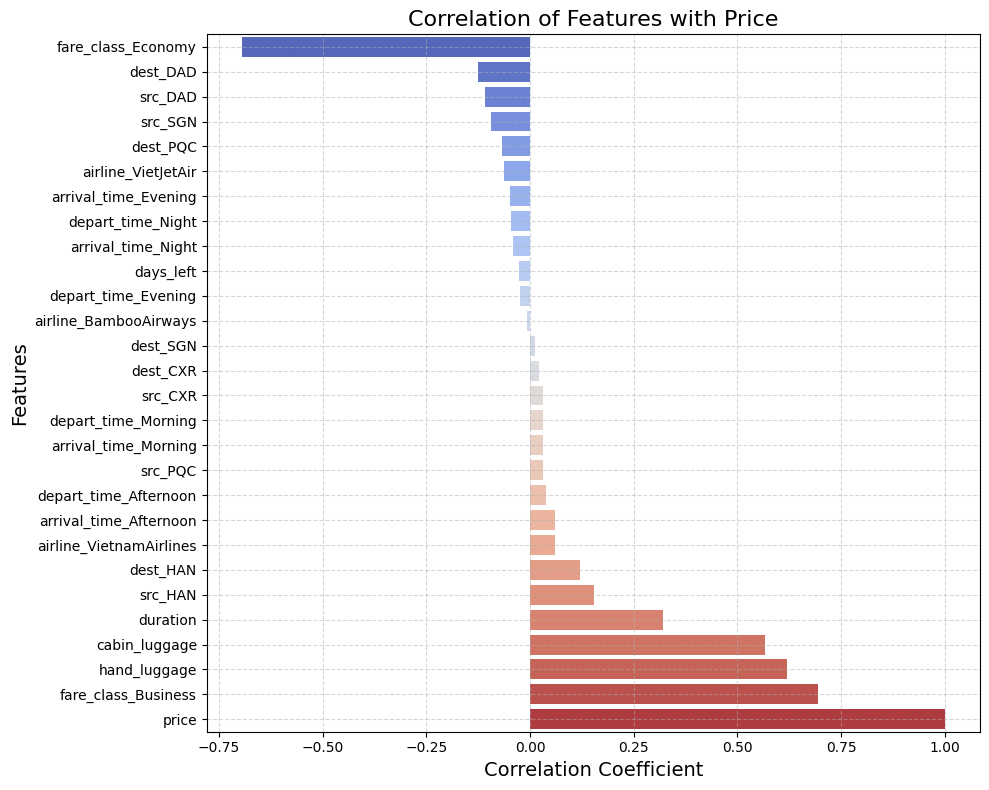

In [19]:
import seaborn as sns

corr = flights_enc.corr()
charges_corr = corr['price'].sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x = charges_corr.values, y = charges_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', alpha=.5)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
import itertools

In [21]:
pip = Pipeline([
    ('normalizer', StandardScaler()),
    ('standarizer', MinMaxScaler()),
    ('reg', Lasso())
])

In [22]:
X = flights_enc.drop(columns=['price'], axis=1)
y = flights_enc['price']

In [23]:
y

66        3949000
67        3949000
68        3949000
69        3949000
70        3949000
           ...   
159933    1905000
159934    1905000
159935    1905000
159936    1905000
159937    1905000
Name: price, Length: 142300, dtype: int64

In [24]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of all combinations of hyperparameters


In [25]:
def MAPE(y_true, y_pred):
    y_test, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100\
    
def metrics(y_true, y_pred):
    print('\n-----------------------------------')
    print(pip.named_steps['reg'])
    print('-----------------------------------')
    print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_true, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(root_mean_squared_error(y_true, y_pred)),3)
    print('R2 Score:', round(r2_score(y_true, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(root_mean_squared_error(y_true, y_pred))),3)
    print('Mean Absolute Percentage Error (MAPE):', round(MAPE(y_true, y_pred), 2), '%')

In [26]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

alpha = [0.1, 0.5, 1.0]
fit_intercept = [True, False]
max_iter = [1000, 2000, 3000]
results_lasso = []
lasso_iter = []
new_row = []
param_combinations = list(itertools.product(alpha, fit_intercept, max_iter))
for params in tqdm(param_combinations, desc="Total Progress"):
    reg_alpha, reg_fit_intercept, reg_max_iter = params
    pip.set_params(reg=Lasso(alpha=reg_alpha, fit_intercept=reg_fit_intercept, max_iter=reg_max_iter, tol=0.01))
    pip.fit(X_train, y_train)
    y_pred = pip.predict(X_test)
    new_row = [
        reg_alpha,
        reg_fit_intercept,
        reg_max_iter,
        round(mean_absolute_error(y_test, y_pred), 3),
        round(mean_squared_error(y_test, y_pred), 0),
        round(np.sqrt(mean_squared_error(y_test, y_pred)), 3),
        round(r2_score(y_test, y_pred), 6),
        round(np.log(np.sqrt(mean_squared_error(y_test, y_pred))), 3),
        round(MAPE(y_test, y_pred), 2)
    ]
    results_lasso.append(new_row)

lasso_iter = pd.DataFrame(results_lasso, columns=['reg_alpha', 'reg_fit_intercept', 'reg_max_iter', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'RMSLE', 'MAPE'])
lasso_iter

Total Progress:   0%|          | 0/18 [00:00<?, ?it/s]

Total Progress: 100%|██████████| 18/18 [01:23<00:00,  4.65s/it]


,reg_alpha,reg_fit_intercept,reg_max_iter,MAE,MSE,RMSE,R2 Score,RMSLE,MAPE
0,0.1,True,1000,474294.563,4.048264e+11,636259.698,0.742806,13.363,17.78
1,0.1,True,2000,474294.563,4.048264e+11,636259.698,0.742806,13.363,17.78
2,0.1,True,3000,474294.563,4.048264e+11,636259.698,0.742806,13.363,17.78
3,0.1,False,1000,474294.233,4.048264e+11,636259.690,0.742806,13.363,17.78
4,0.1,False,2000,474294.233,4.048264e+11,636259.690,0.742806,13.363,17.78
5,0.1,False,3000,474294.233,4.048264e+11,636259.690,0.742806,13.363,17.78
6,0.5,True,1000,474294.589,4.048265e+11,636259.764,0.742806,13.363,17.78
7,0.5,True,2000,474294.589,4.048265e+11,636259.764,0.742806,13.363,17.78
8,0.5,True,3000,474294.589,4.048265e+11,636259.764,0.742806,13.363,17.78
9,0.5,False,1000,474292.935,4.048264e+11,636259.722,0.742806,13.363,17.78


In [27]:
best_lasso = lasso_iter.sort_values(by = 'MSE').head(1)
lasso_iter.sort_values(by='MSE').head(5)

,reg_alpha,reg_fit_intercept,reg_max_iter,MAE,MSE,RMSE,R2 Score,RMSLE,MAPE
3,0.1,False,1000,474294.233,4.048264e+11,636259.690,0.742806,13.363,17.78
4,0.1,False,2000,474294.233,4.048264e+11,636259.690,0.742806,13.363,17.78
5,0.1,False,3000,474294.233,4.048264e+11,636259.690,0.742806,13.363,17.78
0,0.1,True,1000,474294.563,4.048264e+11,636259.698,0.742806,13.363,17.78
1,0.1,True,2000,474294.563,4.048264e+11,636259.698,0.742806,13.363,17.78


In [28]:
pip.set_params(reg=Lasso(alpha=0.1, fit_intercept=False, max_iter=1000, tol=0.01))
pip.fit(X_train, y_train)
y_pred_lasso = pip.predict(X_test)

metrics(y_test, y_pred_lasso)


-----------------------------------
Lasso(alpha=0.1, fit_intercept=False, tol=0.01)
-----------------------------------
Mean Absolute Error (MAE): 474294.233
Root Mean Squared Error (RMSE): 636260 3
R2 Score: 0.742806
Root Mean Squared Log Error (RMSLE): 13 3
Mean Absolute Percentage Error (MAPE): 17.78 %


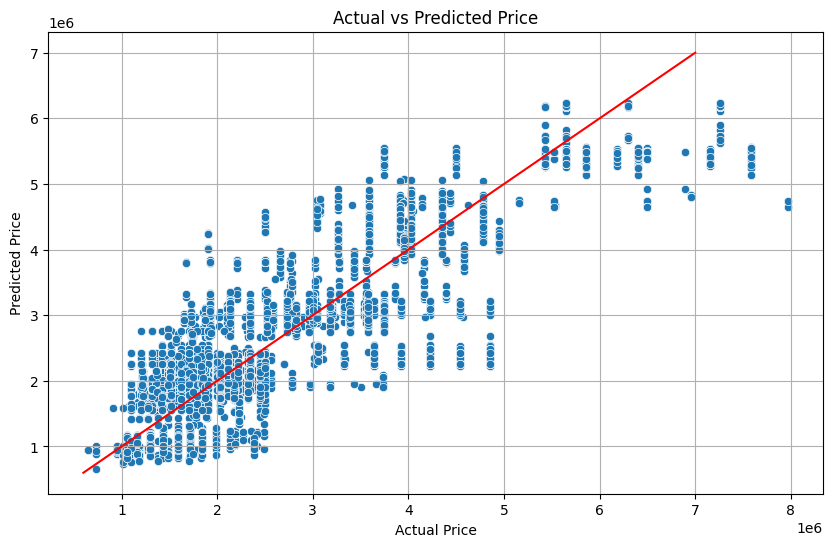

In [29]:
# Plot the predicted vs actual values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([600000, 7000000], [600000, 7000000], color='red', label='Linear Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid()


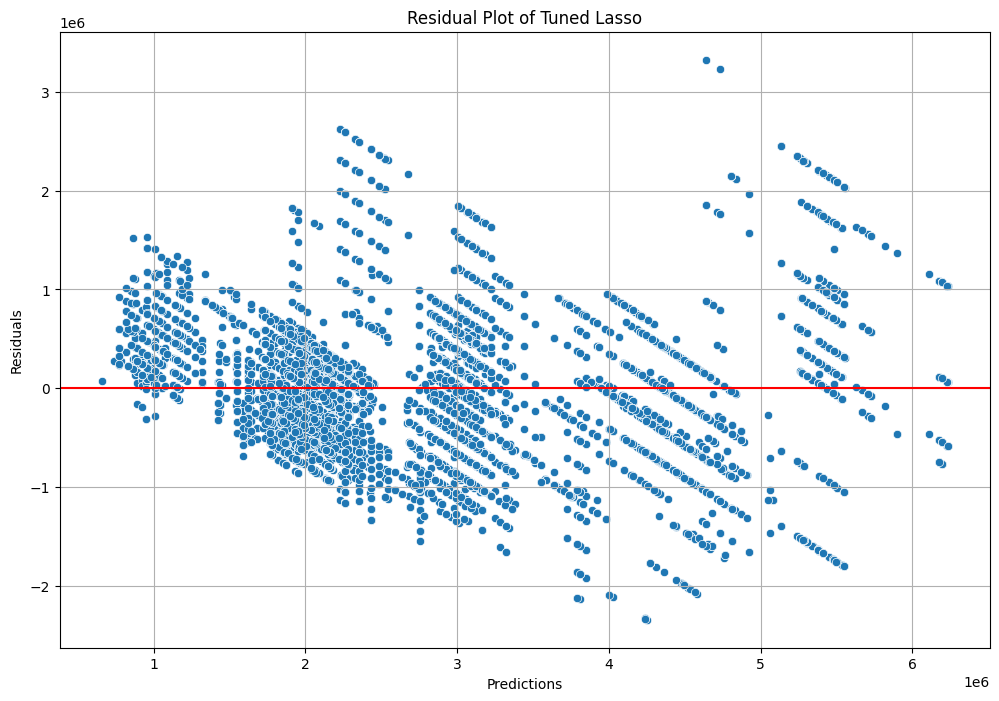

In [30]:
residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_pred, y=residuals_lasso, palette='Blues')
plt.title('Residual Plot of Tuned Lasso')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

In [31]:
from sklearn.utils import all_estimators

def get_all_regressors_sklearn(exclude=None):
    if exclude is None:
        exclude = []
    estimators = all_estimators(type_filter='regressor')
    all_regs = []
    for name, RegClass in estimators:
        if name not in exclude:
            try:
                reg = RegClass()
                all_regs.append(reg)
            except Exception as e:
                pass
    return all_regs
include_regressors = [

]
exclude_regressors = [
    'CCA', 
    'GaussianProcessRegressor', 
    'IsotonicRegression', 
    'KernelRidge',
    'MultiTaskElasticNet', 
    'MultiTaskElasticNetCV', 
    'MultiTaskLasso', 
    'MultiTaskLassoCV',
    'NuSVR',
    'PLSCanonical',
    'SVR',
    'PLSRegression',
    'RadiusNeighborsRegressor',
    'QuantileRegressor',
    'TheilSenRegressor'] 
regs = get_all_regressors_sklearn(exclude=exclude_regressors)
print(regs)

[ARDRegression(), AdaBoostRegressor(), BaggingRegressor(), BayesianRidge(), DecisionTreeRegressor(), DummyRegressor(), ElasticNet(), ElasticNetCV(), ExtraTreeRegressor(), ExtraTreesRegressor(), GammaRegressor(), GradientBoostingRegressor(), HistGradientBoostingRegressor(), HuberRegressor(), KNeighborsRegressor(), Lars(), LarsCV(), Lasso(), LassoCV(), LassoLars(), LassoLarsCV(), LassoLarsIC(), LinearRegression(), LinearSVR(), MLPRegressor(), OrthogonalMatchingPursuit(), OrthogonalMatchingPursuitCV(), PassiveAggressiveRegressor(), PoissonRegressor(), RANSACRegressor(), RandomForestRegressor(), Ridge(), RidgeCV(), SGDRegressor(), TransformedTargetRegressor(), TweedieRegressor()]


In [32]:
a={'Model':[], 'MAE':[], 'MSE':[], 'RMSE':[], 'R2 Score':[], 'RMSLE':[], 'MAPE':[]}
regs_iter=pd.DataFrame(a)
regs_iter.head()

,Model,MAE,MSE,RMSE,R2 Score,RMSLE,MAPE


In [33]:
for regressor in tqdm(regs, desc="Regressor Progress"):
    pip.set_params(reg=regressor)
    pip.fit(X_train, y_train)
    y_pred = pip.predict(X_test)
    
    model_name = str(regressor)
    new_row = {
        'Model': model_name,
        'MAE': round(mean_absolute_error(y_test, y_pred), 3),
        'MSE': round(mean_squared_error(y_test, y_pred), 0),
        'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred)), 3),
        'R2 Score': round(r2_score(y_test, y_pred), 6),
        'RMSLE': round(np.log(np.sqrt(mean_squared_error(y_test, y_pred))), 3),
        'MAPE': round(MAPE(y_test, y_pred), 2)
    }
    regs_iter = pd.concat([regs_iter, pd.DataFrame([new_row])], ignore_index=True)
regs_iter

Regressor Progress: 100%|██████████| 36/36 [04:48<00:00,  8.01s/it]


,Model,MAE,MSE,RMSE,R2 Score,RMSLE,MAPE
0,ARDRegression(),474350.286,4.048285e+11,636261.343,0.742804,13.363,17.78
1,AdaBoostRegressor(),495604.742,4.046786e+11,636143.532,0.742899,13.363,19.84
2,BaggingRegressor(),414586.770,3.510874e+11,592526.315,0.776947,13.292,15.51
3,BayesianRidge(),474300.300,4.048276e+11,636260.651,0.742805,13.363,17.78
4,DecisionTreeRegressor(),415781.088,3.568478e+11,597367.368,0.773287,13.300,15.53
5,DummyRegressor(),1002915.143,1.574248e+12,1254690.503,-0.000152,14.042,39.56
6,ElasticNet(),728226.948,8.806999e+11,938456.109,0.440473,13.752,28.71
7,ElasticNetCV(),1002227.650,1.572212e+12,1253878.765,0.001142,14.042,39.54
8,ExtraTreeRegressor(),416999.143,3.578360e+11,598193.930,0.772660,13.302,15.58
9,ExtraTreesRegressor(),415689.216,3.554438e+11,596191.044,0.774179,13.298,15.51


In [35]:
# Choose the best regressor
best_reg = regs_iter.sort_values(by='MSE').head(10)
best_reg

,Model,MAE,MSE,RMSE,R2 Score,RMSLE,MAPE
12,HistGradientBoostingRegressor(),396000.957,3.007686e+11,548423.707,0.808916,13.215,15.11
11,GradientBoostingRegressor(),411797.247,3.150428e+11,561286.694,0.799847,13.238,15.75
30,RandomForestRegressor(),412527.391,3.455100e+11,587801.018,0.780490,13.284,15.44
2,BaggingRegressor(),414586.770,3.510874e+11,592526.315,0.776947,13.292,15.51
9,ExtraTreesRegressor(),415689.216,3.554438e+11,596191.044,0.774179,13.298,15.51
4,DecisionTreeRegressor(),415781.088,3.568478e+11,597367.368,0.773287,13.300,15.53
8,ExtraTreeRegressor(),416999.143,3.578360e+11,598193.930,0.772660,13.302,15.58
14,KNeighborsRegressor(),423009.318,3.675042e+11,606221.274,0.766517,13.315,15.97
28,PoissonRegressor(),461181.568,3.825255e+11,618486.452,0.756974,13.335,17.21
1,AdaBoostRegressor(),495604.742,4.046786e+11,636143.532,0.742899,13.363,19.84
